# Preamble

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }
plotpars_2x5 = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

# Packages

In [2]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [3]:
results_path = '../../../ShortModelResults_mass_and_z/'  # where the outputs of this notebook will be saved

In [4]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_noemlines.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [5]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

# Posteriors

In [6]:
posteriors

beta[1]    beta[2]    beta[3]   beta[4]   beta[5]
0     -3.685708  32.610873 -68.358126 -0.039401 -0.028859
1     -3.679616  30.225845 -60.233817 -0.089985  0.062002
2     -3.479198  30.017847 -63.905318 -0.093453  0.063950
3     -4.063318  29.893671 -49.725777 -0.111552  0.100827
4     -2.742927  24.280441 -56.647008  0.046149  0.064127
...         ...        ...        ...       ...       ...
39995 -3.803785  31.678070 -64.263827  0.032643  0.077854
39996 -1.811527  16.110379 -40.640781  0.366430  0.123558
39997 -1.818247  15.772861 -41.602050  0.358179  0.122348
39998 -3.629019  31.157302 -69.699928  0.145169  0.134125
39999 -3.424142  26.927712 -51.281300 -0.113373  0.092864

[40000 rows x 5 columns]

In [7]:
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (15, 3)
alpha        = 0.4

In [8]:
dimensions = posteriors.columns.values.reshape(5,1)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

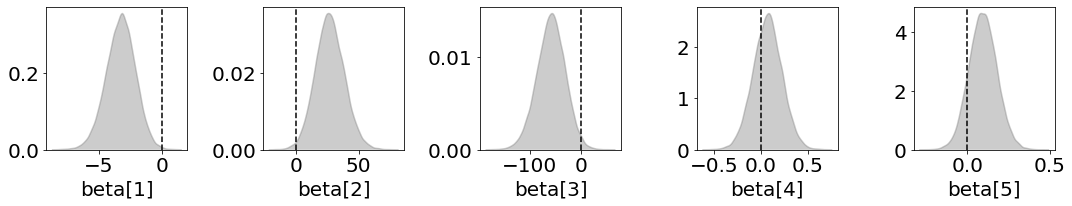

In [9]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(columns, rows, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color='gray', label='')
#         plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
#         plt.xlim([-1.5,1.5])
#         plt.ylim([0,4.5])      
#         if (each_class==0):
#             plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
#         elif (each_class!=0): 
#             plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
# plt.savefig(os.path.join(results_path, '5betas.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '5betas.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [10]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_noemlines.csv'))

In [11]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]',
       'beta[5]', 'eta[1]', 'eta[2]',
       ...
       'pnew[898]', 'pnew[899]', 'pnew[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=2319)

In [12]:
header = np.array(entire_fit.keys())
header

array(['chain', 'draw', 'warmup', ..., 'n_leapfrog__', 'divergent__',
       'energy__'], dtype=object)

In [13]:
# entire_fit

In [14]:
prob_keys = []
for i in header:
    if i[0:4]=='pnew':
        prob_keys.append(i)
    else:
        continue

In [15]:
probabilities = entire_fit[prob_keys]

In [16]:
probabilities

pnew[1]   pnew[2]   pnew[3]   pnew[4]   pnew[5]   pnew[6]   pnew[7]  \
0      0.126991  0.153326  0.182061  0.212668  0.244499  0.276838  0.308956   
1      0.254665  0.295998  0.338445  0.381003  0.422720  0.462770  0.500491   
2      0.293897  0.337098  0.380384  0.422741  0.463294  0.501353  0.536426   
3      0.265750  0.310612  0.357203  0.404419  0.451171  0.496478  0.539534   
4      0.286091  0.318772  0.350923  0.381984  0.411474  0.439004  0.464280   
...         ...       ...       ...       ...       ...       ...       ...   
39995  0.206962  0.244620  0.284204  0.324778  0.365374  0.405081  0.443104   
39996  0.291104  0.311855  0.331702  0.350435  0.367873  0.383864  0.398289   
39997  0.286949  0.306550  0.325167  0.342599  0.358676  0.373256  0.386225   
39998  0.257483  0.298186  0.339430  0.380188  0.419532  0.456692  0.491083   
39999  0.342487  0.386023  0.429111  0.470912  0.510730  0.548040  0.582488   

        pnew[8]   pnew[9]  pnew[10]  ...  pnew[891]  pnew[892]  pnew[893]  \
0      0.340158  0.369828  0.397452  ...   0.463389   0.454333   0.442152   
1      0.535407  0.567217  0.595775  ...   0.577493   0.573162   0.566056   
2      0.568214  0.596579  0.621506  ...   0.552968   0.543401   0.530827   
3      0.579746  0.616731  0.650302  ...   0.686204   0.693293   0.698338   
4      0.487095  0.507318  0.524877  ...   0.579867   0.565983   0.549374   
...         ...       ...       ...  ...        ...        ...        ...   
39995  0.478807  0.511726  0.541564  ...   0.676408   0.671039   0.662947   
39996  0.411052  0.422082  0.431326  ...   0.818106   0.810029   0.800469   
39997  0.397494  0.406994  0.414675  ...   0.787860   0.777385   0.765152   
39998  0.522310  0.550141  0.574480  ...   0.753050   0.742215   0.728506   
39999  0.613879  0.642152  0.667344  ...   0.617248   0.616410   0.613300   

       pnew[894]  pnew[895]  pnew[896]  pnew[897]  pnew[898]  pnew[899]  \
0       0.426912   0.408718   0.387732   0.364192   0.338417   0.310823   
1       0.556145   0.543397   0.527787   0.509309   0.487992   0.463917   
2       0.515232   0.496620   0.475037   0.450589   0.423458   0.393925   
3       0.701393   0.702491   0.701644   0.698843   0.694057   0.687235   
4       0.530018   0.507925   0.483156   0.455842   0.426199   0.394546   
...          ...        ...        ...        ...        ...        ...   
39995   0.652037   0.638196   0.621299   0.601227   0.577881   0.551212   
39996   0.789292   0.776347   0.761468   0.744480   0.725206   0.703472   
39997   0.751009   0.734795   0.716345   0.695496   0.672100   0.646041   
39998   0.711682   0.691481   0.667634   0.639900   0.608099   0.572167   
39999   0.607899   0.600173   0.590080   0.577574   0.562610   0.545155   

       pnew[900]  
0       0.281917  
1       0.437237  
2       0.362383  
3       0.678305  
4       0.361305  
...          ...  
39995   0.521249  
39996   0.679122  
39997   0.617250  
39998   0.532215  
39999   0.525199  

[40000 rows x 900 columns]

In [17]:
probabilities_transposed = probabilities.T

In [18]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=40000, step=1)


In [19]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

40000


In [20]:
probabilities_transposed.columns = new_header

In [21]:
probabilities_transposed

itr0      itr1      itr2      itr3      itr4      itr5  \
pnew[1]    0.126991  0.254665  0.293897  0.265750  0.286091  0.293325   
pnew[2]    0.153326  0.295998  0.337098  0.310612  0.318772  0.328580   
pnew[3]    0.182061  0.338445  0.380384  0.357203  0.350923  0.363520   
pnew[4]    0.212668  0.381003  0.422741  0.404419  0.381984  0.397522   
pnew[5]    0.244499  0.422720  0.463294  0.451171  0.411474  0.430045   
...             ...       ...       ...       ...       ...       ...   
pnew[896]  0.387732  0.527787  0.475037  0.701644  0.483156  0.584772   
pnew[897]  0.364192  0.509309  0.450589  0.698843  0.455842  0.562811   
pnew[898]  0.338417  0.487992  0.423458  0.694057  0.426199  0.538071   
pnew[899]  0.310823  0.463917  0.393925  0.687235  0.394546  0.510598   
pnew[900]  0.281917  0.437237  0.362383  0.678305  0.361305  0.480520   

               itr6      itr7      itr8      itr9  ...  itr39990  itr39991  \
pnew[1]    0.289317  0.235626  0.348080  0.147632  ...  0.441923  0.333756   
pnew[2]    0.323688  0.252742  0.364138  0.160588  ...  0.483733  0.386015   
pnew[3]    0.358506  0.270373  0.379814  0.173546  ...  0.523069  0.437939   
pnew[4]    0.393257  0.288459  0.395043  0.186363  ...  0.559451  0.488114   
pnew[5]    0.427456  0.306934  0.409769  0.198895  ...  0.592591  0.535401   
...             ...       ...       ...       ...  ...       ...       ...   
pnew[896]  0.765392  0.581612  0.525362  0.460528  ...  0.808297  0.660465   
pnew[897]  0.763887  0.595238  0.524549  0.446288  ...  0.791881  0.640580   
pnew[898]  0.761139  0.608370  0.523005  0.430596  ...  0.772552  0.617232   
pnew[899]  0.757119  0.621005  0.520729  0.413519  ...  0.749964  0.590290   
pnew[900]  0.751786  0.633138  0.517719  0.395148  ...  0.723767  0.559696   

           itr39992  itr39993  itr39994  itr39995  itr39996  itr39997  \
pnew[1]    0.311940  0.239938  0.356749  0.206962  0.291104  0.286949   
pnew[2]    0.368754  0.284866  0.404087  0.244620  0.311855  0.306550   
pnew[3]    0.425404  0.331192  0.450390  0.284204  0.331702  0.325167   
pnew[4]    0.479949  0.377526  0.494653  0.324778  0.350435  0.342599   
pnew[5]    0.530855  0.422568  0.536099  0.365374  0.367873  0.358676   
...             ...       ...       ...       ...       ...       ...   
pnew[896]  0.624192  0.539280  0.593984  0.621299  0.761468  0.716345   
pnew[897]  0.585874  0.504281  0.571959  0.601227  0.744480  0.695496   
pnew[898]  0.542382  0.465527  0.546755  0.577881  0.725206  0.672100   
pnew[899]  0.494094  0.423539  0.518397  0.551212  0.703472  0.646041   
pnew[900]  0.441829  0.379109  0.487005  0.521249  0.679122  0.617250   

           itr39998  itr39999  
pnew[1]    0.257483  0.342487  
pnew[2]    0.298186  0.386023  
pnew[3]    0.339430  0.429111  
pnew[4]    0.380188  0.470912  
pnew[5]    0.419532  0.510730  
...             ...       ...  
pnew[896]  0.667634  0.590080  
pnew[897]  0.639900  0.577574  
pnew[898]  0.608099  0.562610  
pnew[899]  0.572167  0.545155  
pnew[900]  0.532215  0.525199  

[900 rows x 40000 columns]

In [22]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [23]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
        print(shrinked_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
        print(shrinked_temp)
shrinked_df = shrinked_temp.T
shrinked_df

            pnew[1]
count  40000.000000
mean       0.282025
std        0.118222
min        0.029728
2.5%       0.094855
25%        0.194176
50%        0.267864
75%        0.355772
97.5%      0.548699
max        0.805475
            pnew[1]       pnew[2]
count  40000.000000  40000.000000
mean       0.282025      0.318074
std        0.118222      0.127818
min        0.029728      0.033311
2.5%       0.094855      0.108891
25%        0.194176      0.222994
50%        0.267864      0.304660
75%        0.355772      0.400096
97.5%      0.548699      0.599780
max        0.805475      0.852381
            pnew[1]       pnew[2]       pnew[3]
count  40000.000000  40000.000000  40000.000000
mean       0.282025      0.318074      0.354034
std        0.118222      0.127818      0.137321
min        0.029728      0.033311      0.035475
2.5%       0.094855      0.108891      0.122902
25%        0.194176      0.222994      0.251932
50%        0.267864      0.304660      0.342184
75%        0.355772   

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

count      mean       std       min      2.5%       25%  \
pnew[1]    40000.0  0.282025  0.118222  0.029728  0.094855  0.194176   
pnew[2]    40000.0  0.318074  0.127818  0.033311  0.108891  0.222994   
pnew[3]    40000.0  0.354034  0.137321  0.035475  0.122902  0.251932   
pnew[4]    40000.0  0.389058  0.146300  0.037644  0.136226  0.279984   
pnew[5]    40000.0  0.422445  0.154423  0.039805  0.148224  0.307246   
...            ...       ...       ...       ...       ...       ...   
pnew[896]  40000.0  0.623534  0.125559  0.138871  0.359805  0.539907   
pnew[897]  40000.0  0.603954  0.129064  0.113141  0.336457  0.516555   
pnew[898]  40000.0  0.581515  0.134091  0.089703  0.307079  0.489634   
pnew[899]  40000.0  0.556326  0.140638  0.069179  0.275011  0.459167   
pnew[900]  40000.0  0.528624  0.148530  0.051891  0.238693  0.423826   

                50%       75%     97.5%       max  
pnew[1]    0.267864  0.355772  0.548699  0.805475  
pnew[2]    0.304660  0.400096  0.599780  0.852381  
pnew[3]    0.342184  0.445186  0.649745  0.887297  
pnew[4]    0.379085  0.488801  0.694854  0.913011  
pnew[5]    0.414856  0.529929  0.736058  0.931884  
...             ...       ...       ...       ...  
pnew[896]  0.631698  0.715769  0.841433  0.951200  
pnew[897]  0.610851  0.698759  0.830943  0.947166  
pnew[898]  0.587113  0.679969  0.820258  0.946667  
pnew[899]  0.560032  0.659503  0.812194  0.945991  
pnew[900]  0.530561  0.636972  0.803862  0.945133  

[900 rows x 10 columns]

In [24]:
print(shrinked_df.values.shape, parameters.shape)

(900, 10) (900, 2)


In [25]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [26]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [27]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [28]:
shrinked_df

count      mean       std       min      2.5%       25%  \
pnew[1]    40000.0  0.282025  0.118222  0.029728  0.094855  0.194176   
pnew[2]    40000.0  0.318074  0.127818  0.033311  0.108891  0.222994   
pnew[3]    40000.0  0.354034  0.137321  0.035475  0.122902  0.251932   
pnew[4]    40000.0  0.389058  0.146300  0.037644  0.136226  0.279984   
pnew[5]    40000.0  0.422445  0.154423  0.039805  0.148224  0.307246   
...            ...       ...       ...       ...       ...       ...   
pnew[896]  40000.0  0.623534  0.125559  0.138871  0.359805  0.539907   
pnew[897]  40000.0  0.603954  0.129064  0.113141  0.336457  0.516555   
pnew[898]  40000.0  0.581515  0.134091  0.089703  0.307079  0.489634   
pnew[899]  40000.0  0.556326  0.140638  0.069179  0.275011  0.459167   
pnew[900]  40000.0  0.528624  0.148530  0.051891  0.238693  0.423826   

                50%       75%     97.5%       max  LOG_STELLAR_MASS         Z  
pnew[1]    0.267864  0.355772  0.548699  0.805475          9.729482  0.067940  
pnew[2]    0.304660  0.400096  0.599780  0.852381          9.729482  0.077608  
pnew[3]    0.342184  0.445186  0.649745  0.887297          9.729482  0.087275  
pnew[4]    0.379085  0.488801  0.694854  0.913011          9.729482  0.096943  
pnew[5]    0.414856  0.529929  0.736058  0.931884          9.729482  0.106610  
...             ...       ...       ...       ...               ...       ...  
pnew[896]  0.631698  0.715769  0.841433  0.951200         11.678570  0.309630  
pnew[897]  0.610851  0.698759  0.830943  0.947166         11.678570  0.319297  
pnew[898]  0.587113  0.679969  0.820258  0.946667         11.678570  0.328965  
pnew[899]  0.560032  0.659503  0.812194  0.945991         11.678570  0.338632  
pnew[900]  0.530561  0.636972  0.803862  0.945133         11.678570  0.348300  

[900 rows x 12 columns]

In [29]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [30]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [31]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [32]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

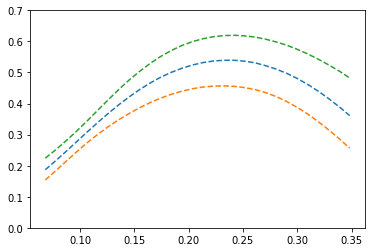

In [33]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.7])
plt.show()

In [34]:
np.unique(prob01['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [35]:
subset = prob01[prob01['Z']<0.07]

In [36]:
subset

count      mean       std       min      2.5%       25%  \
pnew[1]    40000.0  0.282025  0.118222  0.029728  0.094855  0.194176   
pnew[31]   40000.0  0.260669  0.099571  0.038181  0.100235  0.187333   
pnew[61]   40000.0  0.241919  0.083641  0.047808  0.104711  0.180858   
pnew[91]   40000.0  0.225767  0.070866  0.054430  0.107677  0.174393   
pnew[121]  40000.0  0.212088  0.061434  0.053085  0.108209  0.167810   
pnew[151]  40000.0  0.200686  0.055264  0.051791  0.106607  0.160912   
pnew[181]  40000.0  0.191331  0.051990  0.050545  0.102206  0.153787   
pnew[211]  40000.0  0.183795  0.051022  0.049346  0.096304  0.146984   
pnew[241]  40000.0  0.177867  0.051694  0.043638  0.090268  0.140645   
pnew[271]  40000.0  0.173363  0.053421  0.036480  0.084237  0.134863   
pnew[301]  40000.0  0.170130  0.055771  0.031125  0.078310  0.129834   
pnew[331]  40000.0  0.168048  0.058462  0.027116  0.073212  0.125530   
pnew[361]  40000.0  0.167026  0.061325  0.024132  0.068913  0.122421   
pnew[391]  40000.0  0.167002  0.064270  0.021943  0.065824  0.120255   
pnew[421]  40000.0  0.167937  0.067259  0.020389  0.063283  0.119040   
pnew[451]  40000.0  0.169822  0.070294  0.019362  0.061640  0.118645   
pnew[481]  40000.0  0.172669  0.073404  0.017805  0.060803  0.119050   
pnew[511]  40000.0  0.176512  0.076645  0.016341  0.060566  0.120382   
pnew[541]  40000.0  0.181410  0.080097  0.015277  0.060994  0.122402   
pnew[571]  40000.0  0.187446  0.083863  0.014548  0.061981  0.125571   
pnew[601]  40000.0  0.194723  0.088077  0.014114  0.063134  0.129690   
pnew[631]  40000.0  0.203367  0.092895  0.013949  0.064827  0.134841   
pnew[661]  40000.0  0.213523  0.098498  0.014045  0.066509  0.140539   
pnew[691]  40000.0  0.225349  0.105078  0.014406  0.068202  0.147177   
pnew[721]  40000.0  0.239009  0.112831  0.015053  0.070018  0.154736   
pnew[751]  40000.0  0.254655  0.121923  0.016023  0.071651  0.162961   
pnew[781]  40000.0  0.272415  0.132468  0.017229  0.072886  0.172155   
pnew[811]  40000.0  0.292362  0.144492  0.015816  0.073982  0.182351   
pnew[841]  40000.0  0.314493  0.157903  0.014032  0.074463  0.192931   
pnew[871]  40000.0  0.338703  0.172476  0.011654  0.074607  0.204591   

                50%       75%     97.5%       max  LOG_STELLAR_MASS        Z  
pnew[1]    0.267864  0.355772  0.548699  0.805475          9.729482  0.06794  
pnew[31]   0.249396  0.322717  0.483485  0.708574          9.796692  0.06794  
pnew[61]   0.233113  0.294284  0.427293  0.620810          9.863902  0.06794  
pnew[91]   0.219059  0.270181  0.381549  0.553171          9.931112  0.06794  
pnew[121]  0.206743  0.250876  0.346595  0.495652          9.998322  0.06794  
pnew[151]  0.195926  0.235847  0.320986  0.477868         10.065532  0.06794  
pnew[181]  0.187012  0.224317  0.304668  0.461510         10.132742  0.06794  
pnew[211]  0.179360  0.216060  0.295231  0.446597         10.199952  0.06794  
pnew[241]  0.173139  0.210211  0.290914  0.433479         10.267161  0.06794  
pnew[271]  0.168187  0.206223  0.291368  0.441079         10.334371  0.06794  
pnew[301]  0.164405  0.203934  0.295082  0.453904         10.401581  0.06794  
pnew[331]  0.161666  0.203162  0.300119  0.475594         10.468791  0.06794  
pnew[361]  0.159880  0.203498  0.307015  0.494074         10.536001  0.06794  
pnew[391]  0.158829  0.204878  0.315352  0.509269         10.603211  0.06794  
pnew[421]  0.158976  0.207179  0.324566  0.521151         10.670421  0.06794  
pnew[451]  0.160086  0.210379  0.335077  0.534349         10.737631  0.06794  
pnew[481]  0.162357  0.214792  0.345935  0.557626         10.804841  0.06794  
pnew[511]  0.165374  0.220383  0.359029  0.591571         10.872051  0.06794  
pnew[541]  0.169783  0.227073  0.373081  0.625807         10.939261  0.06794  
pnew[571]  0.175128  0.234964  0.387156  0.659924         11.006471  0.06794  
pnew[601]  0.181945  0.244468  0.403245  0.693496         11.073681  0.06794  
pnew[631]  0.190006  0.255924  0.423201  0

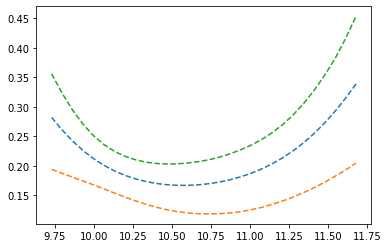

In [37]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [38]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [39]:
summary_stan

parameter    mean  se_mean      sd    2.5%     25%     50%     75%  \
0      pnew[1]  0.2820   0.0008  0.1182  0.0949  0.1942  0.2679  0.3558   
1      pnew[2]  0.3181   0.0009  0.1278  0.1089  0.2230  0.3047  0.4001   
2      pnew[3]  0.3540   0.0010  0.1373  0.1229  0.2519  0.3422  0.4452   
3      pnew[4]  0.3891   0.0012  0.1463  0.1362  0.2800  0.3791  0.4888   
4      pnew[5]  0.4224   0.0013  0.1544  0.1482  0.3072  0.4149  0.5299   
..         ...     ...      ...     ...     ...     ...     ...     ...   
895  pnew[896]  0.6235   0.0008  0.1256  0.3598  0.5399  0.6317  0.7158   
896  pnew[897]  0.6040   0.0008  0.1291  0.3365  0.5166  0.6109  0.6988   
897  pnew[898]  0.5815   0.0009  0.1341  0.3071  0.4896  0.5871  0.6800   
898  pnew[899]  0.5563   0.0009  0.1406  0.2749  0.4592  0.5600  0.6595   
899  pnew[900]  0.5286   0.0010  0.1485  0.2387  0.4238  0.5306  0.6370   

      97.5%  n_eff  Rhat         Z  LOG_STELLAR_MASS  
0    0.5488  22835   1.0  0.067940          9.729482  
1    0.5998  19915   1.0  0.077608          9.729482  
2    0.6498  17434   1.0  0.087275          9.729482  
3    0.6949  15532   1.0  0.096943          9.729482  
4    0.7361  14089   1.0  0.106610          9.729482  
..      ...    ...   ...       ...               ...  
895  0.8415  23633   1.0  0.309630         11.678570  
896  0.8310  24212   1.0  0.319297         11.678570  
897  0.8203  24018   1.0  0.328965         11.678570  
898  0.8122  23033   1.0  0.338632         11.678570  
899  0.8039  21467   1.0  0.348300         11.678570  

[900 rows x 13 columns]

In [40]:
np.unique(summary_stan['LOG_STELLAR_MASS'].values)

array([ 9.729482  ,  9.79669193,  9.86390186,  9.93111179,  9.99832172,
       10.06553166, 10.13274159, 10.19995152, 10.26716145, 10.33437138,
       10.40158131, 10.46879124, 10.53600117, 10.6032111 , 10.67042103,
       10.73763097, 10.8048409 , 10.87205083, 10.93926076, 11.00647069,
       11.07368062, 11.14089055, 11.20810048, 11.27531041, 11.34252034,
       11.40973028, 11.47694021, 11.54415014, 11.61136007, 11.67857   ])

In [41]:
chosen_mass = np.unique(summary_stan['LOG_STELLAR_MASS'].values)[25]

In [42]:
chosen_mass

11.409730275862069

In [43]:
subset_temp = summary_stan[summary_stan['LOG_STELLAR_MASS']==chosen_mass]

In [44]:
# subset_temp

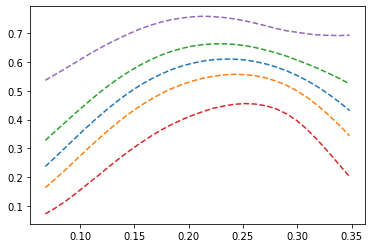

In [45]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [46]:
np.unique(summary_stan['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [47]:
chosen_z = np.unique(summary_stan['Z'].values)[5]

In [48]:
chosen_z

0.11627793103448275

In [49]:
subset_temp = summary_stan[summary_stan['Z']==chosen_z]

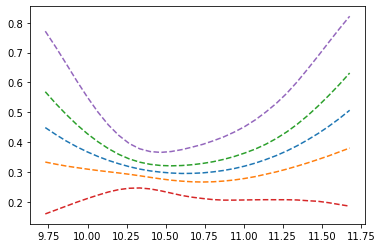

In [50]:
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['50%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['25%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['75%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['97.5%'], '--')
plt.show()

In [51]:
%matplotlib notebook

<IPython.core.display.Javascript object>


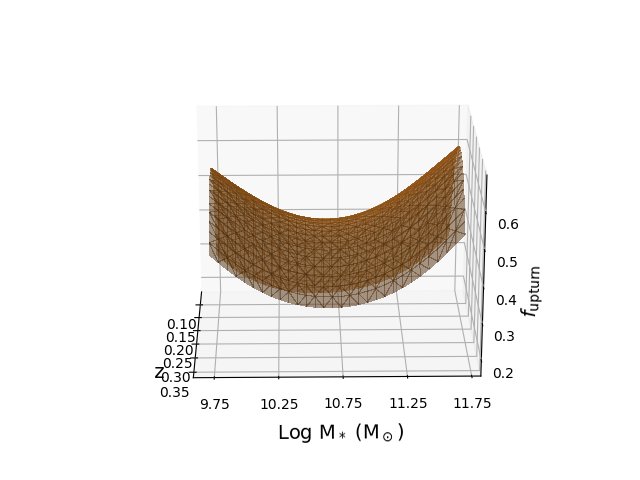

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='#a6611a', alpha=0.5, 
                linewidth=0, antialiased=False)
# ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.5, 
#                 linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel(r"$f_{\rm{upturn}}$", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
for i in range(360):
    ax.view_init(elev=22., azim=(i))
    plt.savefig(os.path.join(results_path, 'regression_el22_az'+str(i+10)+'.png'))
    i+=10
plt.show()

In [ ]:
prob01.boxplot(column='50%')

In [ ]:
prob01.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [ ]:
m = 0.01
z = np.arange(0., 0.35, 0.01)
p = posteriors

In [ ]:
regression_temp = []
for i in range(p['beta[1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1]'].values[i]
        b = p['beta[2]'].values[i] * z[redshift]
        c = p['beta[3]'].values[i] * z[redshift]**2
        d = p['beta[4]'].values[i] * m
        e = p['beta[5]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
    
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [ ]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [ ]:
idx = np.where(beta<=10)

In [ ]:
plt.plot(redsh[idx], prob[idx], '--', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()